In [45]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sqlalchemy import create_engine
import funciones as fx
from pandas import ExcelWriter
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msngo

from sklearn.tree import DecisionTreeRegressor

In [46]:
conn = fx.conexion_sqlalchemy()

In [66]:
df_train = fx.selectViewTrain(conn)
df_test = fx.selectViewTest(conn)

In [67]:
df_train.head()

,Id,Vin,Year,Price,Mileage,City,City_Id,State,State_Id,Make,...,Model_Id,Doors,Fuel_Type,Fuel_Id,Engine_Displacement_CC,Engine_Displacement_CI,Engine_Number_Cylinders,Transmission_Speeds,Gama,Gama_Id
0,1,19VDE1F52DE012636,2013,10888,19606,Long Island City,8923,NY,41,Acura,...,1226,4,gasoline,6,1997.000000,121.9,4,5,generalista,1
1,2,19VDE1F71EE003817,2014,10999,39922,Windsor,10156,CO,8,Acura,...,1226,4,gasoline,6,1997.000000,121.9,4,5,generalista,1
2,3,19UDE2F32GA001284,2016,14799,22142,Lindon,8893,UT,52,Acura,...,1229,4,gasoline,6,2359.737216,144.0,4,8,generalista,1
3,4,JH4CU2F83CC019895,2012,7989,105246,Miami,9057,FL,13,Acura,...,2394,4,gasoline,6,2359.737216,144.0,4,5,generalista,1
4,5,JH4CU2F64DC006203,2013,13995,32384,West Jordan,10092,UT,52,Acura,...,2393,4,gasoline,6,2359.737216,144.0,4,5,generalista,1


In [62]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618256 entries, 0 to 618255
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Id                       618256 non-null  int64  
 1   Vin                      618256 non-null  object 
 2   Year                     618256 non-null  int64  
 3   Price                    618256 non-null  int64  
 4   Mileage                  618256 non-null  int64  
 5   City                     618256 non-null  object 
 6   City_Id                  618256 non-null  int64  
 7   State                    618256 non-null  object 
 8   State_Id                 618256 non-null  int64  
 9   Make                     618256 non-null  object 
 10  Make_Id                  618256 non-null  int64  
 11  Model                    618256 non-null  object 
 12  Model_Id                 618256 non-null  int64  
 13  Doors                    618256 non-null  int64  
 14  Fuel

In [63]:
df_test.head()

,Id,Vin,Year,Price,Mileage,City,City_Id,State,State_Id,Make,...,Model_Id,Doors,Fuel_Type,Fuel_Id,Engine_Displacement_CC,Engine_Displacement_CI,Engine_Number_Cylinders,Transmission_Speeds,Gama,Gama_Id
0,1,19VDE2E53EE000083,2014,8995,35725,El Paso,8307,TX,51,Acura,...,1227,4,gasoline,6,2354.000000,144.0,4,6,generalista,1
1,2,19VDE2E52DE000025,2013,8995,48851,El Paso,8307,TX,51,Acura,...,1227,4,gasoline,6,2354.000000,144.0,4,6,generalista,1
2,3,JH4CU2F84EC002686,2014,14490,34032,Greatneck,8550,NY,41,Acura,...,2397,4,gasoline,6,2359.737216,144.0,4,5,generalista,1
3,4,JH4CU2F44CC003220,2012,12921,58550,Boise,7867,ID,19,Acura,...,2394,4,gasoline,6,2359.737216,144.0,4,5,generalista,1
4,5,19VDE1F31EE009243,2014,14995,23454,Hackettstown,8583,NJ,38,Acura,...,1226,4,gasoline,6,1997.000000,121.9,4,5,generalista,1


In [64]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206042 entries, 0 to 206041
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Id                       206042 non-null  int64  
 1   Vin                      206042 non-null  object 
 2   Year                     206042 non-null  int64  
 3   Price                    206042 non-null  int64  
 4   Mileage                  206042 non-null  int64  
 5   City                     206042 non-null  object 
 6   City_Id                  206042 non-null  int64  
 7   State                    206042 non-null  object 
 8   State_Id                 206042 non-null  int64  
 9   Make                     206042 non-null  object 
 10  Make_Id                  206042 non-null  int64  
 11  Model                    206042 non-null  object 
 12  Model_Id                 206042 non-null  int64  
 13  Doors                    206042 non-null  int64  
 14  Fuel

In [69]:
#dividir dataset segun gama('generalista, premium, super-premium')

df_test_generalista = df_test[df_test.Gama == 'generalista']
df_test_generalista = df_test_generalista.select_dtypes(include='number')
#df_test_generalista.info()

df_test_premium = df_test[df_test.Gama == 'premium']
df_test_premium = df_test_premium.select_dtypes(include='number')
#df_test_premium.info()

df_test_super_premium = df_test[df_test.Gama == 'super-premium']
df_test_super_premium = df_test_super_premium.select_dtypes(include='number')
#df_test_super_premium.info()

<AxesSubplot: xlabel='Price', ylabel='Make'>

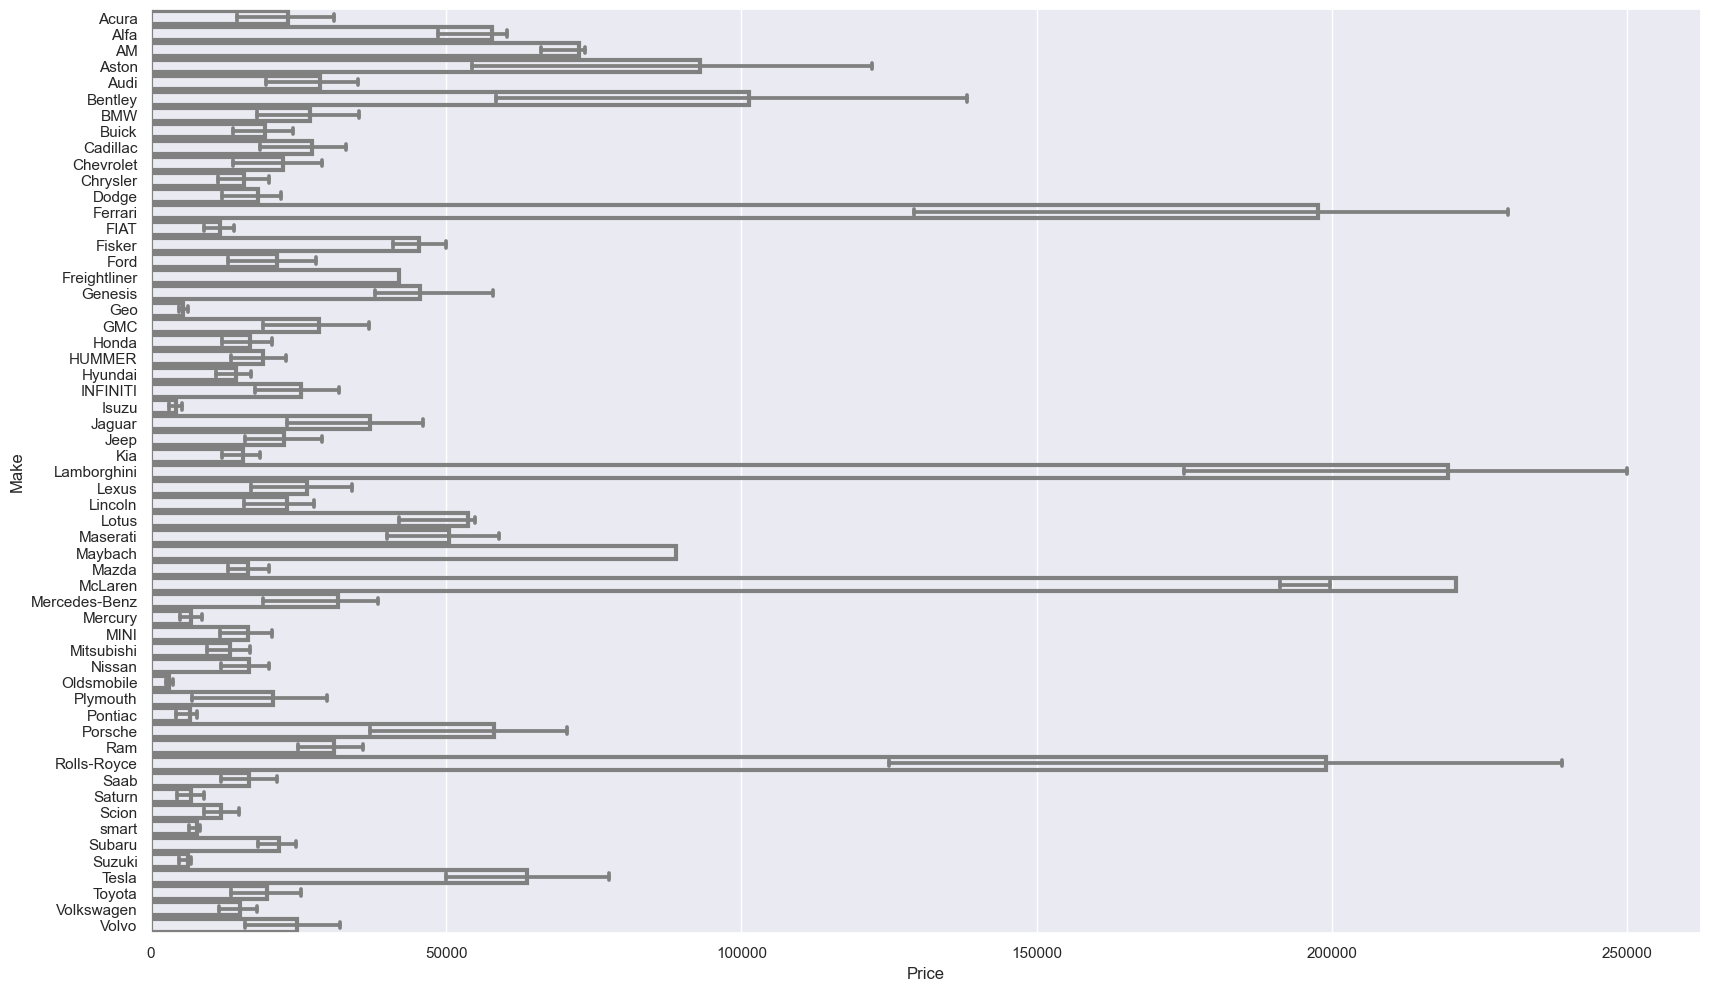

In [30]:
sns.set(rc = {'figure.figsize':(20,12)})
X = df_test.Price
Y = df_test.Make
sns.barplot(
    data=df_test, x=X, y=Y,
    errorbar=("pi", 50), capsize=.4, errcolor=".5",
    linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0),
)

In [77]:
def boxplot_graph(X, Y, Title):
    boxplot = sns.boxplot(x=X, y=Y)
    boxplot.axes.set_title(Title, fontsize=16)
    boxplot.set_xlabel("Make", fontsize=14)
    boxplot.set_ylabel("Price", fontsize=14)
    plt.xticks(rotation=90) 
    plt.show()

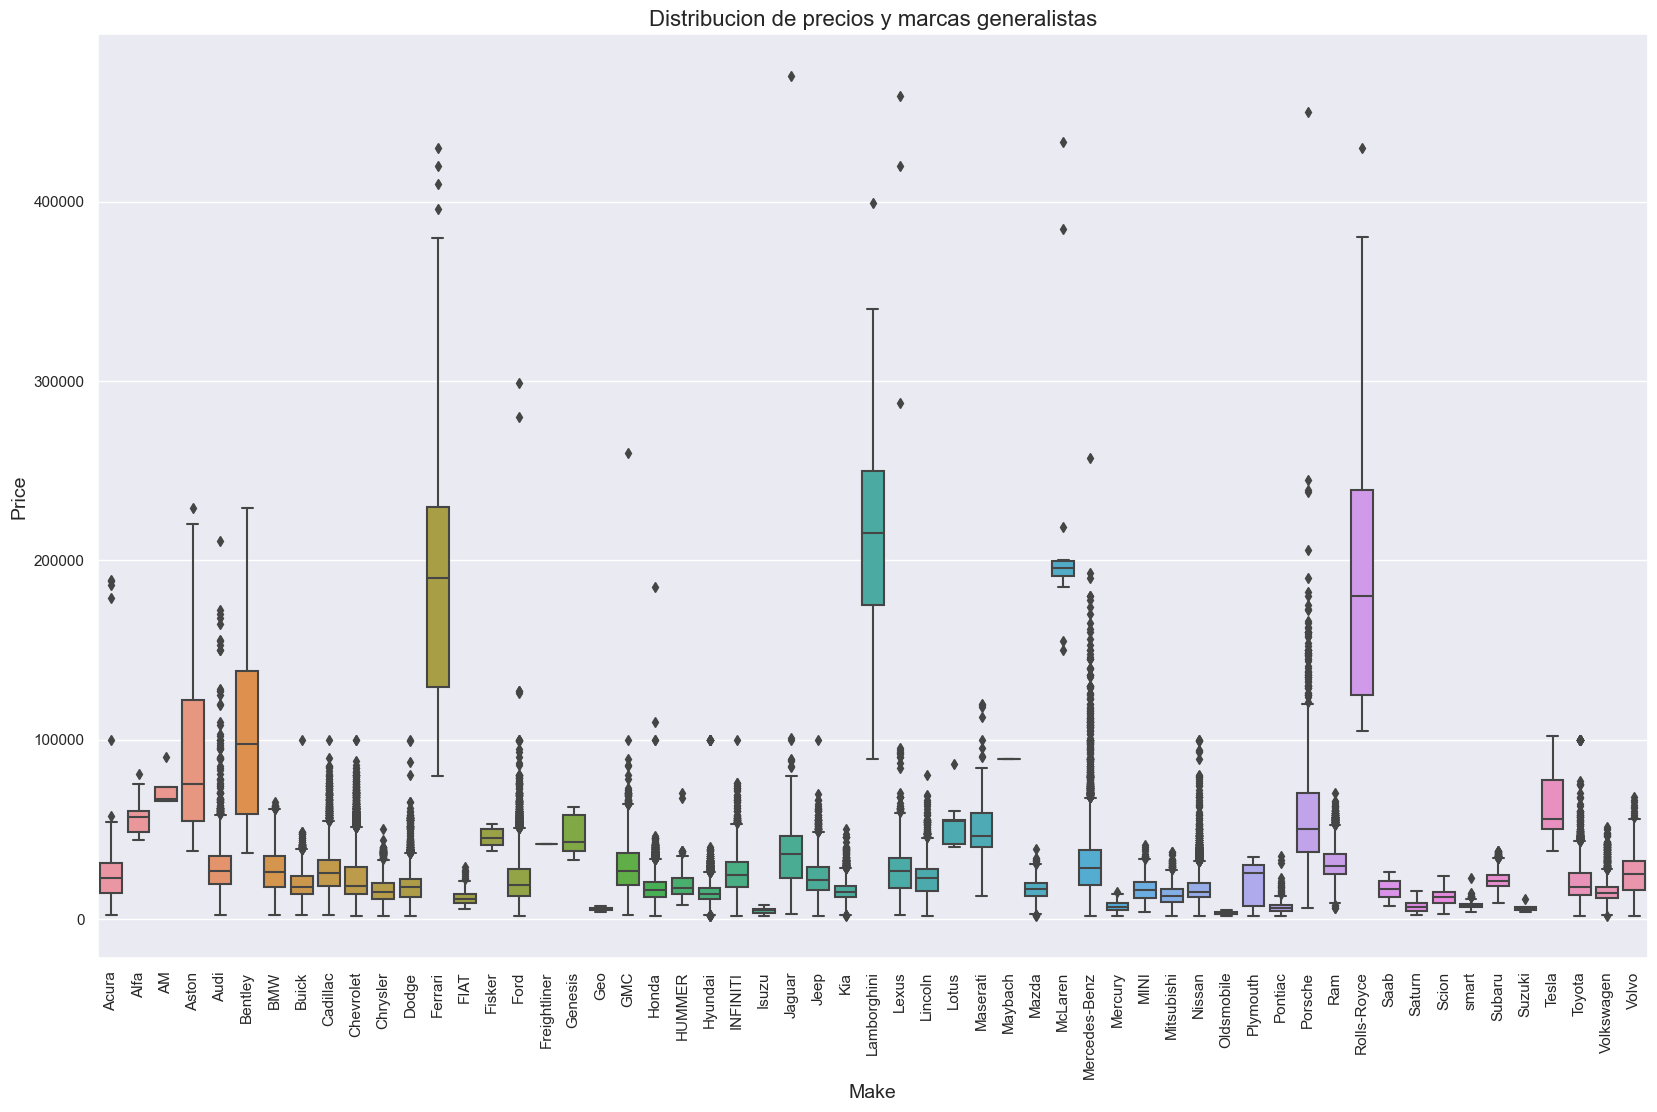

In [84]:
boxplot_graph(df_test['Make'], df_test['Price'], 'Distribucion de precios y marcas generalistas')

In [96]:
y = df_test_generalista['Price', 'Year', 'Mileage']]
print(y)

#boxplot_graph(df_test['Make'], y, 'Distribucion de precios y marcas generalistas')

KeyError: ('Price', 'Year', 'Mileage')

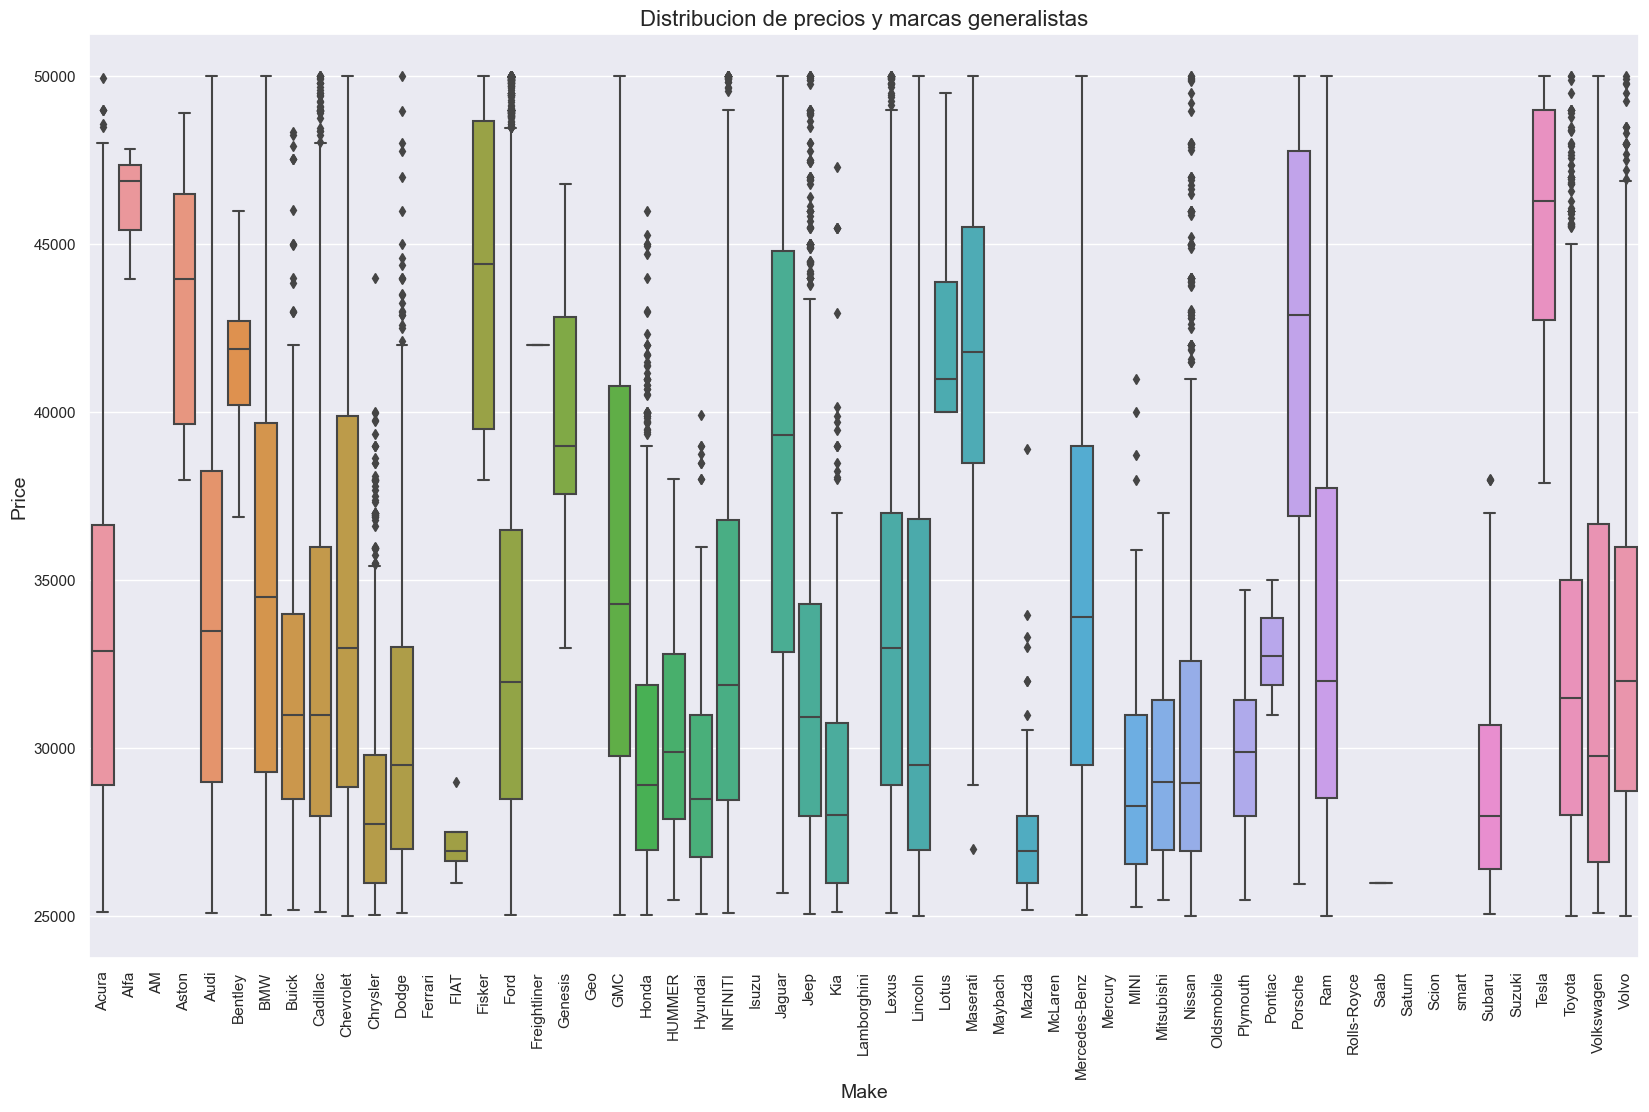

In [86]:
boxplot_graph(df_test['Make'], df_test_premium['Price'], 'Distribucion de precios y marcas generalistas')

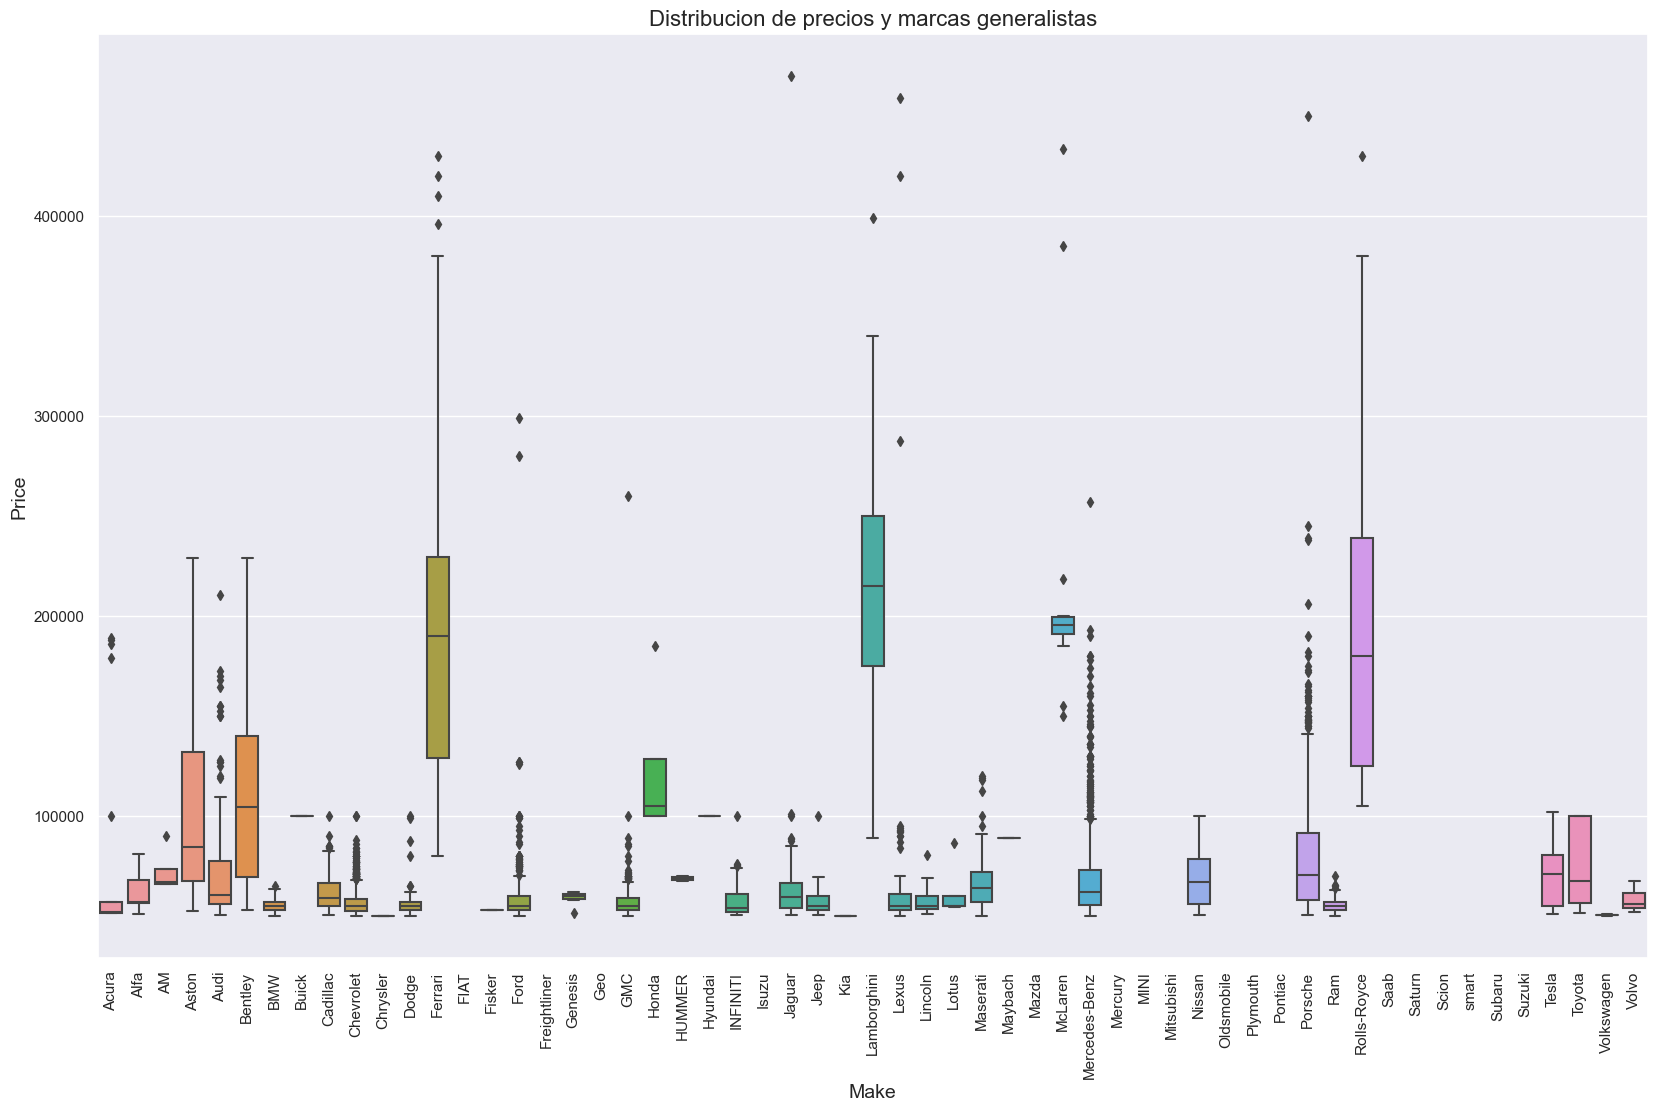

In [87]:
boxplot_graph(df_test['Make'], df_test_super_premium['Price'], 'Distribucion de precios y marcas generalistas')

In [89]:
df_test_generalista.shape

(145767, 15)

Los precios que estan fuera de la distribución normal se eliminaran del dataset
Método de puntuación Z para eliminar valores atípicos

In [90]:
df_test_generalista_clean = fx.remove_outlier(df_test_generalista, 'Price', 1.5)
df_test_generalista_clean.shape

(72485, 15)

In [91]:
df_test_premium.shape

(55010, 15)

In [92]:
df_test_premium_clean = fx.remove_outlier(df_test_premium, 'Price', 1.5)
df_test_premium_clean.shape

(27485, 15)

In [93]:
df_test_super_premium.shape

(4906, 15)

In [94]:
df_test_super_premium_clean = fx.remove_outlier(df_test_super_premium, 'Price', 1.5)
df_test_super_premium_clean.shape

(2443, 15)

<AxesSubplot: >

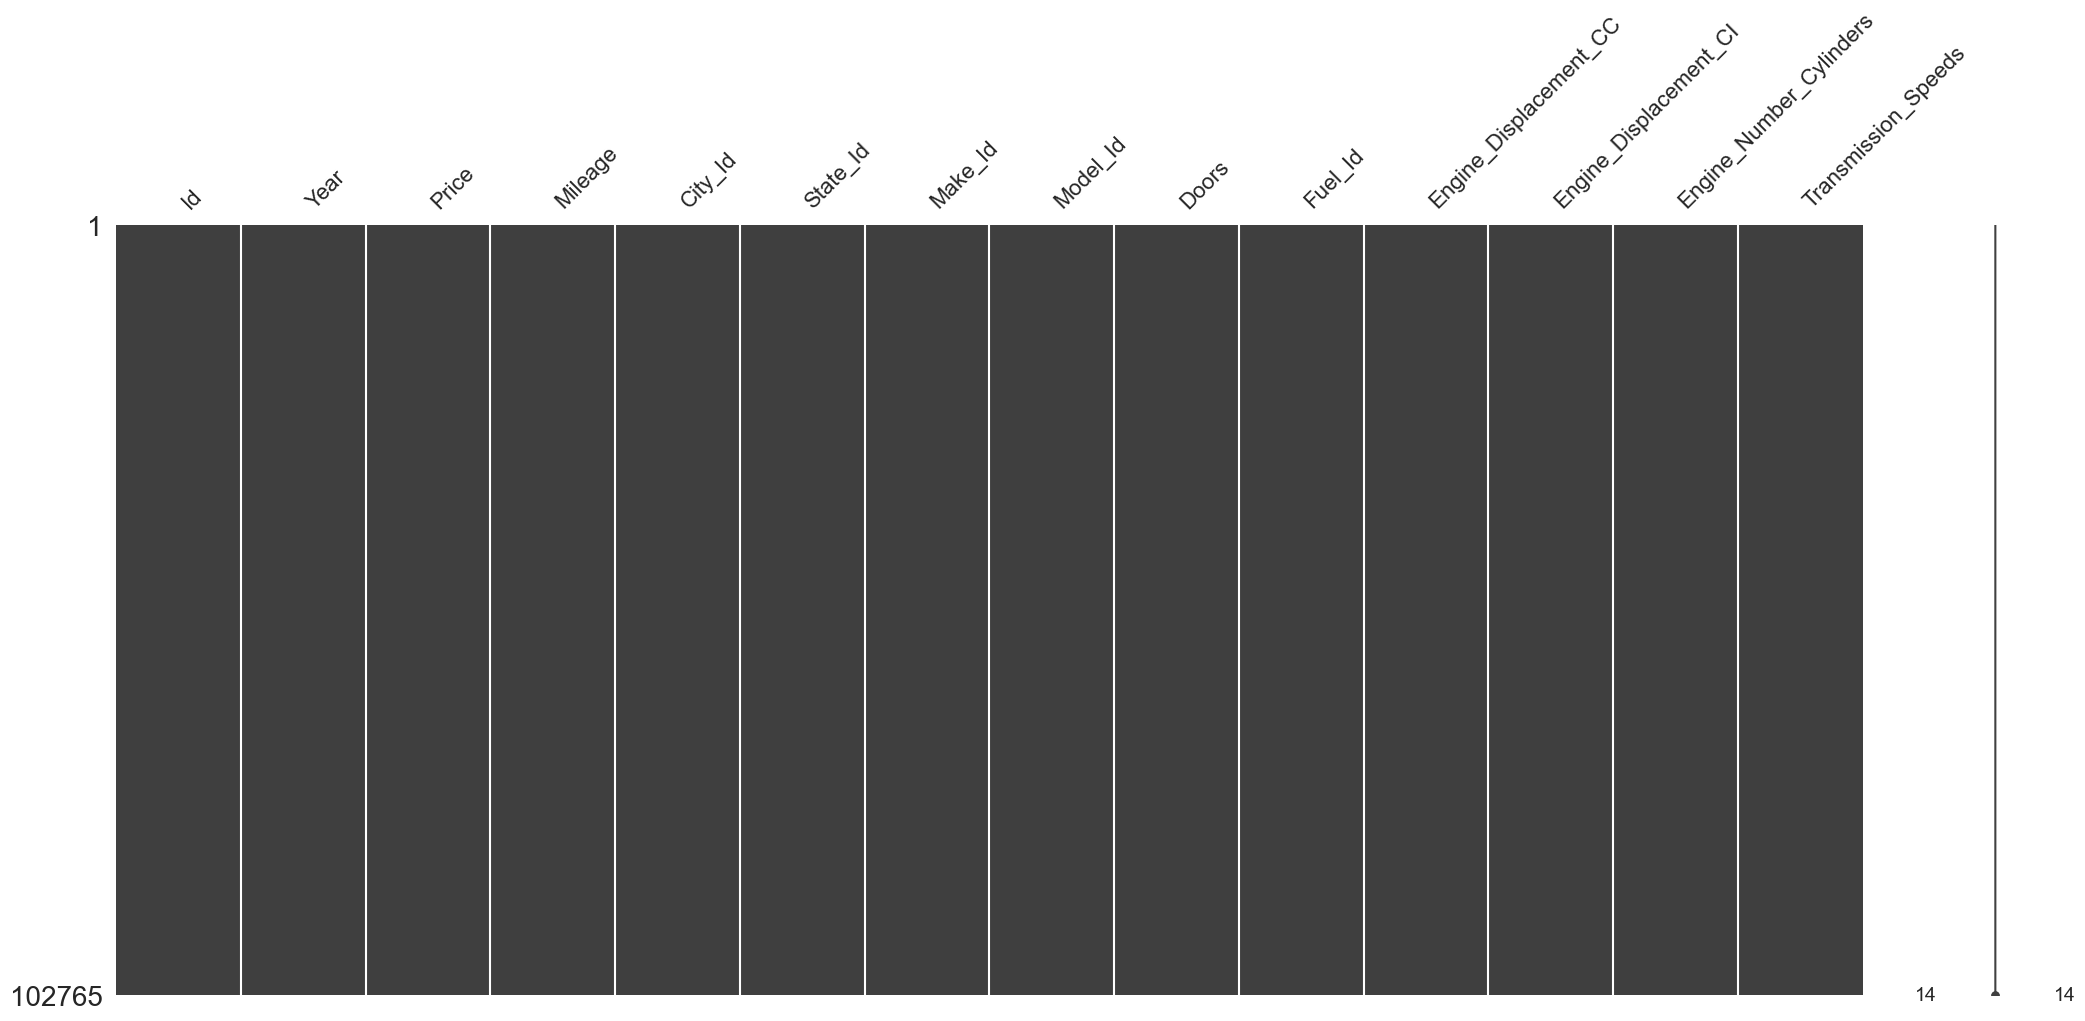

In [41]:
msngo.matrix(df_clean_test)

<AxesSubplot: >

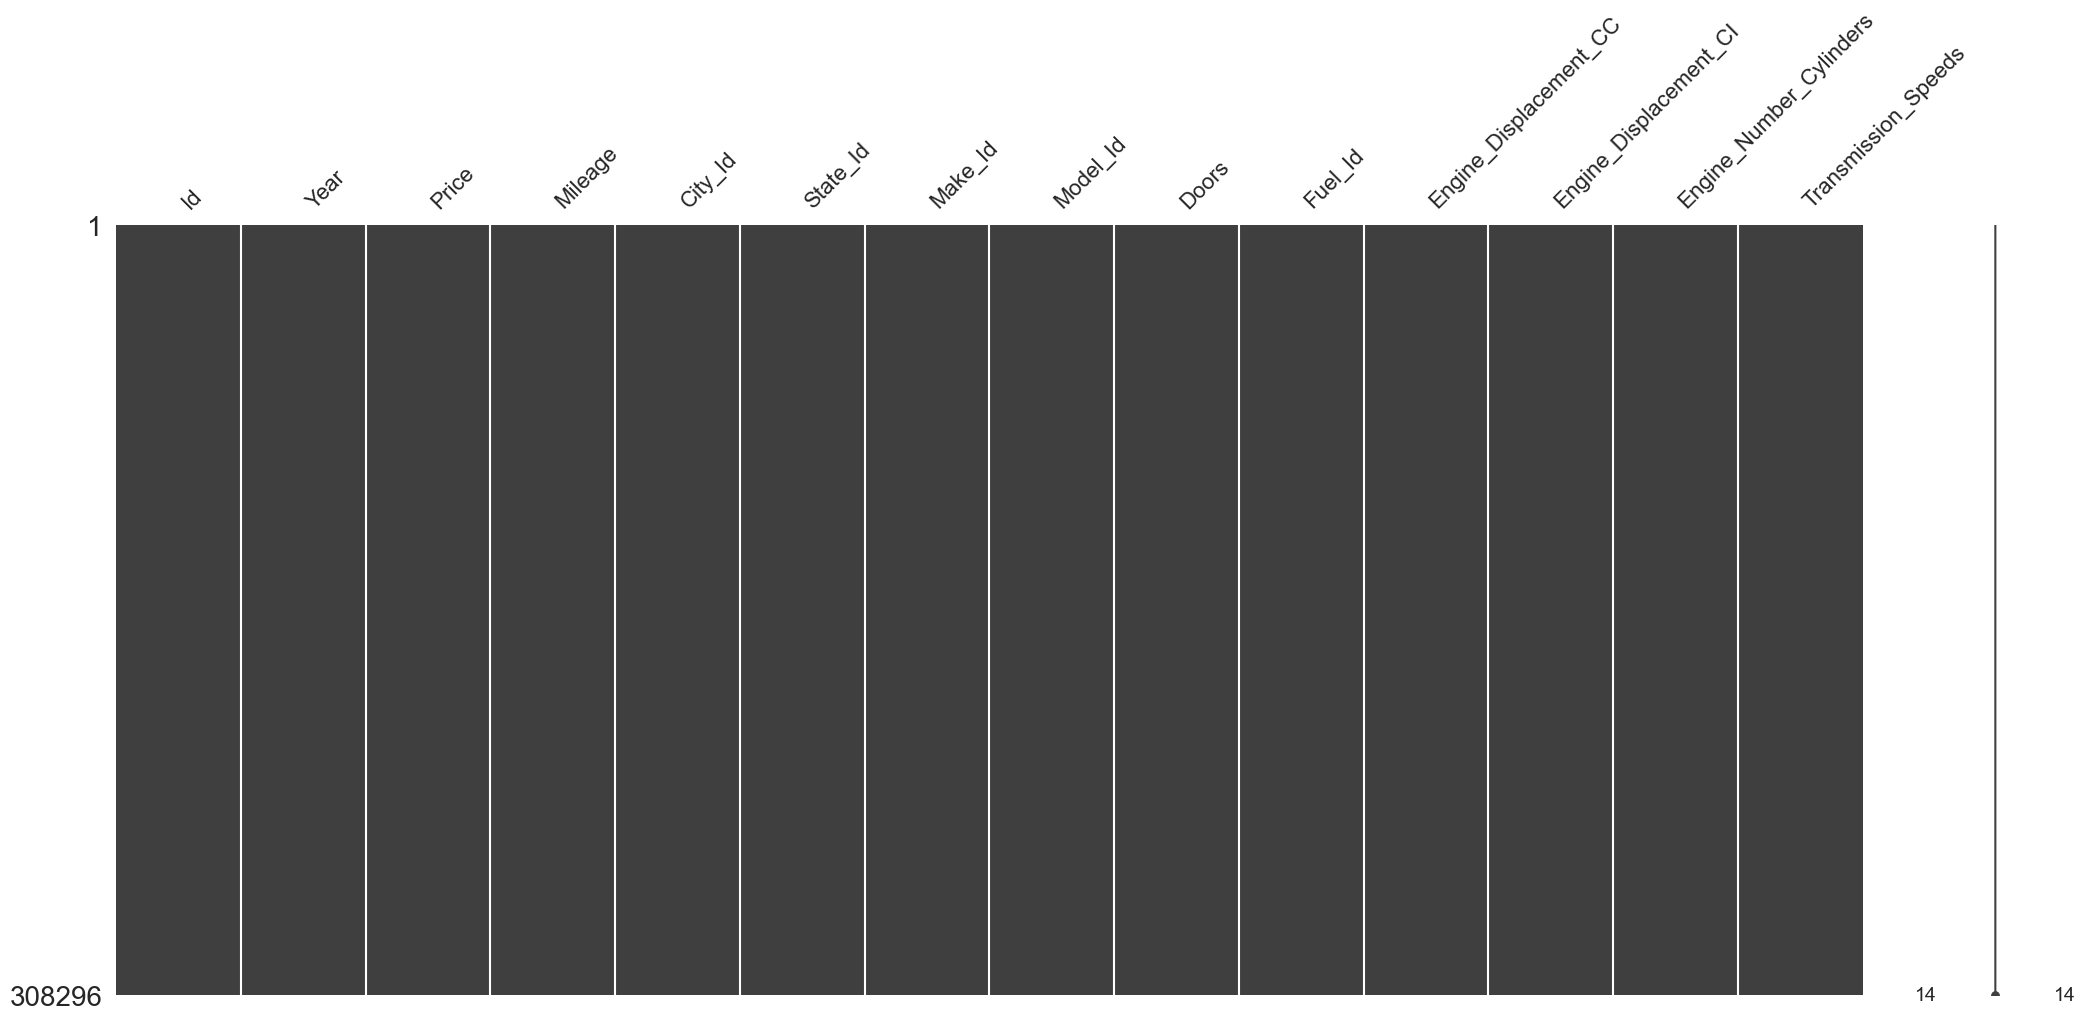

In [42]:
msngo.matrix(df_clean_train)

In [43]:
X_train_model = df_.drop(columns = ['Price'])
y_train_model = df_clean_train['Price']

clf_dt = DecisionTreeRegressor().fit(X_train_model, y_train_model)

In [44]:
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score, confusion_matrix

X_test_model = df_clean_test.drop(columns = ['Price'])
y_test_model = df_clean_test['Price']

y_hat_dt = clf_dt.predict(X_test_model)
print(f'''Reporte para DecisionTreeRegressor
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para DecisionTreeRegressor
RMSE: 5086.7870699923205
MAE: 3267.0
R2 Score: -0.7723773258791462
